# **Classificação**

In [1]:
# importe as principais bibliotecas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## **TOC:**
Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) [Introdução](#intro)
- 2) [Métricas de performance para problemas de classificação](#metricas)
- 3) [Regressão logística](#reglog)
    - 3.1) [Teoria](#teoria_reglog)
    - 3.2) [Exemplo](#exemplo_reglog)
    - 3.3) [ROC](#roc)
    - 3.4) [Precision vs Recall](#precision_recall)
- 4) [Exercicio](#exercicios)

____
____
____

## 1) **Introdução** <a class="anchor" id="nao_supervisionado"></a>

**Problemas de Classificação** são aqueles em que queremos determinar a que **CATEGORIA** dentro de um **CONJUNTO DE CATEGORIAS** uma dada observação pertence, com base em suas features.

Para isso, construímos um **CLASSIFICADOR**: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas)


Principal diferença entre problemas de regressão e classificação:
- Regressão: valores contínuos;
- Classificação: valores (classes) discretas (binárias ou não).

<center><img src="https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1" width=700></center>

---

<center><img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300></center>

Exemplos de problemas de classificação:
- Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    - Features: palavras contidas no corpo do e-mail; remetente; assunto;
- Detecção de doenças: que codição médica a pessoa tem?
    - Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
- Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    - Features: palavras no corpo do texto; título;
- Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    - Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
- Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    - Features: histórico de pagamento; score de crédito;
    
  
<center><img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500></center>



Veremos hoje um dos mais simples e poderosos classificadores: a **LOGIT!**


---

## 2) **Métricas de performance para problemas de classificação** <a class="anchor" id="metricas"></a>

Após treinar o modelo, como podemos avaliar sua performance?

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<center><img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400"></center>

No Sklearn, a notação muda um pouco:

<center><img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400></center>

In [2]:
y_test = pd.Series([1,0,0,0,1,1,0,1], name="true")
y_hat = pd.Series([1,0,0,0,1,1,1,1], name="hat")

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[3, 1],
       [0, 4]])

In [3]:
pd.crosstab(y_test, y_hat)

hat,0,1
true,,
0,3,1
1,0,4


Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Um jeito fácil de lembrar os tipos de erros:


<center><img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="200" width="300"></center>


Além disso, temos as seguintes métricas numéricas de avaliação:

- **Acurácia (Accuracy)**: porcentagem de classificações CORRETAS do modelo;

- **Precisão (Precision)**: das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- **Revocação/Sensibilidade (Recall/Sensitivity)**: das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- **F1-Score**: média harmônica de precision e recall.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=250></center>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, a métrica a ser otimizada é o F1! 


<center><img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" height="300" width="300"></center>

Adiante, veremos como calcular a matriz de confusão e as métricas acima para problemas de classificação!

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [5]:
y_test = pd.Series([1,0,0,0,1,1,0,1], name="true")
y_hat = pd.Series([1,0,0,0,1,1,1,1], name="hat")

precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
acc = accuracy_score(y_test, y_hat)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Acuracia: {acc}")


Precision: 0.8
Recall: 1.0
F1-Score: 0.888888888888889
Acuracia: 0.875


In [6]:
y_test = pd.Series([1,0,0,0,1,1,0,1], name="true")
y_hat = pd.Series([1,0,0,0,1,1,1,1], name="hat")

precision = precision_score(y_test, y_hat, pos_label=0)
recall = recall_score(y_test, y_hat, pos_label=0)
f1 = f1_score(y_test, y_hat, pos_label=0)
acc = accuracy_score(y_test, y_hat, )
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Acuracia: {acc}")


Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571
Acuracia: 0.875


___

## 3) **Regressão Logística** <a class="anchor" id="reglog"></a>

### 3.1) **Teoria** <a class="anchor" id="teoria_reglog"></a>

A [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (também chamado de **logit**), apesar do nome, é um modelo de classificação!

- Classificação binária: duas classes (0 e 1);
- Classificação multiclasse: n classes (0, 1, ..., n-1), com $n \in \mathbb{N}$

Dado um conjunto de features $x$ qual a probabilidade de $x \in 1$, queremos encontrar um modelo que nos dê:

$$ P( x \in 1 | x) $$

Naturalmente, $0 \le P(x) \le 1$. Assim, por exemplo, se:
- $P(x) \ge 0,5$: x pertence à classe 1
- $P(x) < 0.5$: x pertence à classe 0

Obs.: este valor de 0.5 (50%) é chamado de "cutoff", e pode ser ajustado, embora seja comum fixá-lo em 50%!

Poderíamos pensar em utilizar a regressão linear em nossos problemas de classificação, mas isso não é uma boa ideia: acabamos encontrando probabilidades negativas e fit ruim!

No exemplo a seguir, temos a probabilidade de não-pagamento (default) de um empréstimo com base em uma feature (balanço). Note probabilidades negativas!

<figure>
    <center>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/70189f79-2886-4e59-893b-1dac9dd64078.png" height="400" width="400">
    <figcaption>
        Regressão Linear para classificação. 
    </figcaption>
    </center>
</figure> 

Para resolver este problema, podemos adaptar a função de regressão linear para uma função que tem imagem entre 0 e 1. Seria legal se tivéssemos algo como:

<figure>
    <center>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/6d54529a-d295-47a3-8a11-1f426fde7229.png" height="400" width="400">
    </center>
</figure> 

Um exemplo de tal função é a FUNÇÃO LOGÍSTICA ou FUNÇÃO SIGMOIDAL:

<center><img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width=400></center>

Note que:
- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

Para incorporar a ideia da regressão linear na regressão logística, tomamos:

- $z = \beta_0 + \beta_1x$, que é o modelo de regressão linear (uma variável);

E substituímos na função logística:

$$\phi(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

Com isso, tomamos qualquer output real do modelo linear e transformamos em um valor entre 0 e 1, como queríamos!

No nosso caso, como queremos modelar probabilidades, tomamos, no caso de uma feature:

$$P(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

Ou, para a regressão logística múltipla com $p$ features:


$$P((x_1, \cdots, x_p)) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}}$$

---

## **Exemplo** <a class="anchor" id="exemplo_reglog"></a>

Para introduzirmos as ideias, utilizaremos um dataset de marketing (propagandas/advertising). Este é um dataset artificial e didático, com os dados bem separáveis, o que é ótimo para ilustração!

A base que utilizaremos contém as seguintes colunas:

* 'Daily Time Spent on Site': tempo que o cliente ficou no site (em minutos);
* 'Age': idade do cliente (em anos);
* 'Area Income': média salarial (por ano) da região geográfica do cliente;
* 'Daily Internet Usage': tempo médio (em minutos) que o cliente fica na internet;
* 'Ad Topic Line': título do anúncio;
* 'City': cidade do cliente;
* 'Male': dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* 'Country': país do cliente;
* 'Timestamp': marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* 'Clicked on Ad': dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Nosso objetivo é criar um modelo que possa prever se um determinado usuário clickará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Tomamos como variáveis independentes (preditores/features) as primeiras 9 colunas, enquanto nossa variável dependente (target) é a última coluna ("Clicked on Ad").

Ou seja, nosso modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features clickará no anúncio ou não. 

__IMPORTANTE!__

Pense no problema de negócio que estamos querendo resolver com nosso modelo -- direcionamento de marketing! Temos os dados dos nossos clientes (customer-centric), nós os conhecemos! Não podemos utilizar essa informação a nosso favor?

Talvez não faça sentido exibir o anúncio para um usuário que tem baixa probabilidade de clickar no ad, não é mesmo? 

Por outro lado, é muito mais eficiente direcionar nosso marketing aos clientes com alta chance de clickar no nosso anúncio!

Assim, economizamos dinheiro (todo anúncio é pago!), e ganhamos em eficiência e alcance!

---

O código abaixo é apenas para formatar os números em até 3 casas decimais. 

Fica aqui pra conhecimento e também pq vai nos auxiliar a ver melhor as probabilidades no final.

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, precision=3)

In [8]:
df = pd.read_csv('data/advertising.csv')

In [9]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
303,77.560,38,63336.850,130.830,Right-sized multi-tasking solution,Port Angelamouth,1,Uganda,2016-05-19 03:52:24,1
557,79.670,28,58576.120,226.790,Total grid-enabled application,Charlesbury,0,Comoros,2016-07-20 01:56:33,0
843,74.610,38,71055.220,231.280,Networked impactful framework,East Christopher,1,South Africa,2016-04-06 23:10:40,0
210,76.810,28,65172.220,217.850,Managed zero tolerance concept,East Paul,1,Fiji,2016-07-03 12:57:03,0
49,48.010,46,54286.100,119.930,Centralized 24/7 installation,West Christopher,0,Italy,2016-04-25 11:01:54,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,65.000,36.009,55000.000,180.000,0.481,0.500
std,15.854,8.786,13414.634,43.902,0.500,0.500
min,32.600,19.000,13996.500,104.780,0.000,0.000
25%,51.360,29.000,47031.802,138.830,0.000,0.000
50%,68.215,35.000,57012.300,183.130,0.000,0.500
75%,78.547,42.000,65470.635,218.792,1.000,1.000
max,91.430,61.000,79484.800,269.960,1.000,1.000


Alguma observação notável?

In [12]:
df["Clicked on Ad"].value_counts(normalize=True)

0   0.500
1   0.500
Name: Clicked on Ad, dtype: float64

Temos um dataset balanceado no target, o que __bem raro na vida real!__

Um dataset desbalanceado pode causar sérios problemas de performance ao modelo! Há várias técnicas para lidar com tal problema, mas, neste primeiro exemplo, não nos preocuparemos com isso...

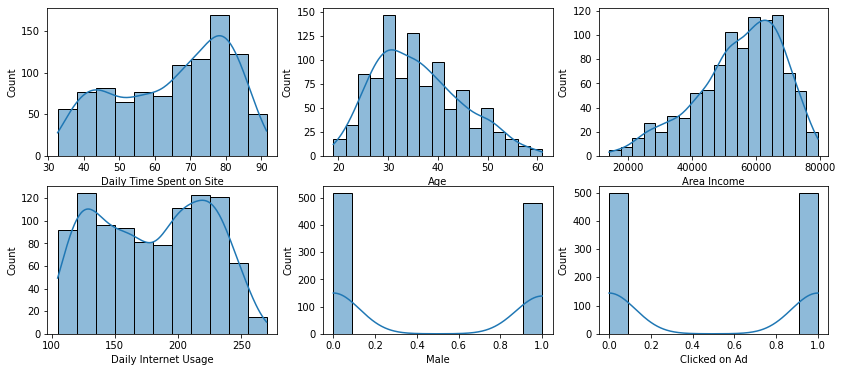

In [13]:
columns = df.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(2, 3, figsize=(14,6))

for column, ax in zip(columns, axs.flatten()):
    sns.histplot(data=df, x=column, kde=True, ax=ax)

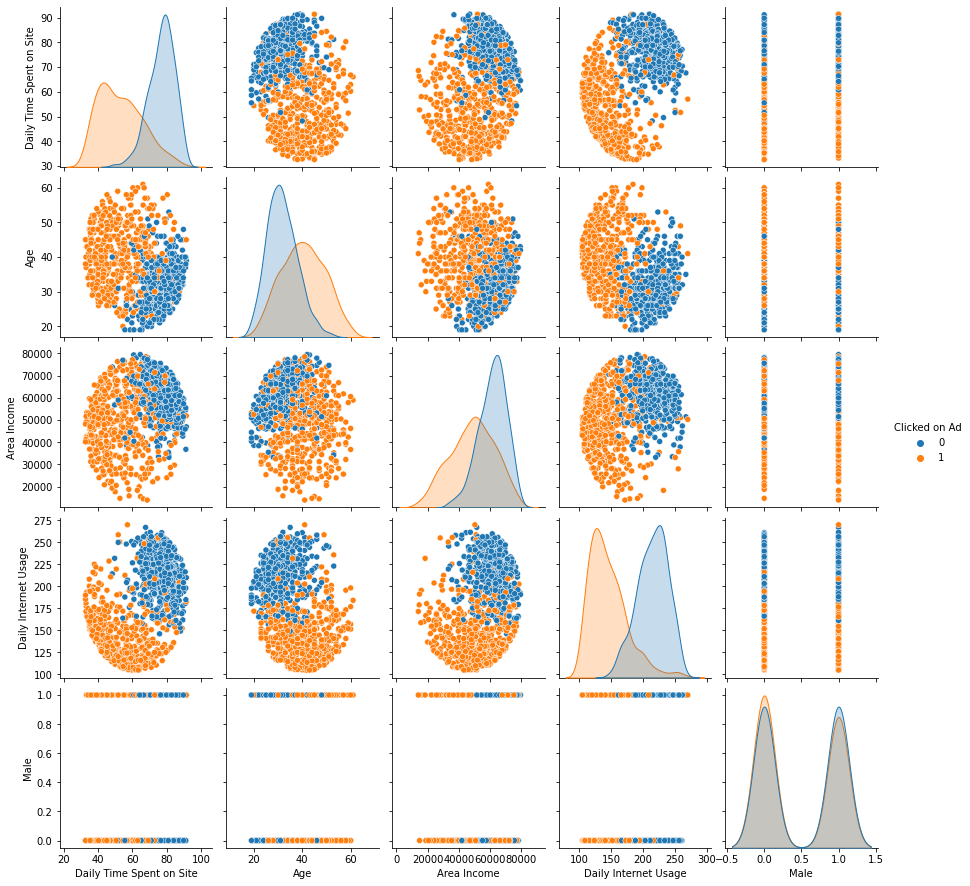

In [14]:
sns.pairplot(df, hue="Clicked on Ad")
plt.show()

Como tínhamos comentado no início, nossos dados são muito bem separáveis!

Isto favorece bastante a performance do nosso modelo. Mas, lembre-se, é bem raro encontrar casos assim na vida real! (É aí que devemos partir para métodos mais avançados, como SVM, árvores, etc.)

Vamos começar a construir o modelo?

In [15]:
X = df.select_dtypes(include=[np.number]).drop(columns="Clicked on Ad")
y = df["Clicked on Ad"]

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
estimador = LogisticRegression()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
modelo = estimador.fit(X_train, y_train)

__Modelo treinado!__

Vamos ver os coeficientes do modelo:

In [20]:
modelo.intercept_

array([0.006])

In [21]:
modelo.coef_

array([[-0.056,  0.262, -0.   , -0.027,  0.002]])

Lembre-se que, diferentemente da regressão linear, devido ao fato da função logística ser uma exponencial, a variação de $P(x)$ depende de x, e não apenas dos coeficientes! Então, a interpretação dos coeficientes não é tão imediata. 

Mas, os sinais carregam significado. Para um coeficiente:
- positivo ($\beta_i > 0$), temos que um aumento em x levará a um aumento de $P(x)$;
- negativo ($\beta_i < 0$), temos que um aumento em x levará a uma diminuição de $P(x)$

Mas, a variacão de $P(x)$ em si, depende do valor de x!

__Agora que o modelo está treinado, vamos avaliá-lo!__

In [22]:
y_pred = modelo.predict(X_test)
y_pred[:5]

array([0, 1, 1, 1, 0])

Como vimos no passo 2, em problemas de classificação é muito comum utilizarmos a **matriz de confusão** e as **métricas de classificação** para avaliar nossos modelos.

Dado isso, o sklearn já disponibilica estas funcionalidades:

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))
print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[85  4]
 [16 95]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



Conforme esperado, nosso modelo está muito bom! Um f1-score tão alto na vida real é algo notável!

Isso se deve à grande separabilidade dos nossos dados!

Além dos coeficientes do modelo, algo muito interessante que a classe do sklearn tem é o método `predict_proba()`

Esse método retorna exatamente qual é a probabilidade modelada pelo logit.

Isso pode ser muito útil, pois assim conseguimos **mudar qual é o threshold de esclha de classe** para ser algo diferente de 0.5!


In [24]:
modelo.classes_

array([0, 1])

In [25]:
modelo.predict(X_test)[:5]

array([0, 1, 1, 1, 0])

In [26]:
probs = modelo.predict_proba(X_test)
probs[:5]

array([[0.502, 0.498],
       [0.003, 0.997],
       [0.05 , 0.95 ],
       [0.01 , 0.99 ],
       [0.968, 0.032]])

In [27]:
cutoff = 0.7
np.where(probs[:, 0] > cutoff, 0, 1)[:5]

array([1, 1, 1, 1, 0])

Juntando todas as etapas:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("data/advertising.csv")
df = df.select_dtypes(include=[np.number])

X = df.drop(columns = "Clicked on Ad")
y = df['Clicked on Ad']

estimador = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = estimador.fit(X_train, y_train)

print("Coeficientes:", modelo.coef_)
print("Intercept:", modelo.intercept_)

classes =  modelo.classes_
print("Classes:", classes)

probs = modelo.predict_proba(X_test)

probs_0 = probs[:, 0]

threshold_list = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

Coeficientes: [[-0.056  0.262 -0.    -0.027  0.002]]
Intercept: [0.006]
Classes: [0 1]


In [29]:
print("Avaliação de modelos com diferentes valores de cutoff")

for threshold in threshold_list:
    
    print("Cutoff:", threshold)
    
    # previsões
    y_pred = np.where(probs_0 > threshold, 0, 1)

    print("Matriz de confusão do modelo nos dados de teste:")
    print(confusion_matrix(y_test, y_pred))

    print("Classification report do modelo nos dados de teste:")
    print(classification_report(y_test, y_pred))
    print("#"*54)

Avaliação de modelos com diferentes valores de cutoff
Cutoff: 0.3
Matriz de confusão do modelo nos dados de teste:
[[88  1]
 [26 85]]
Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87        89
           1       0.99      0.77      0.86       111

    accuracy                           0.86       200
   macro avg       0.88      0.88      0.86       200
weighted avg       0.89      0.86      0.86       200

######################################################
Cutoff: 0.4
Matriz de confusão do modelo nos dados de teste:
[[86  3]
 [24 87]]
Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        89
           1       0.97      0.78      0.87       111

    accuracy                           0.86       200
   macro avg       0.87      0.88      0.86       200
weighted avg       0.88     

### 3.3) **ROC** <a class="anchor" id="roc"></a>

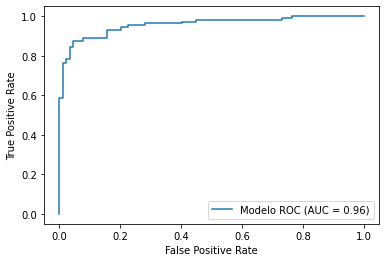

In [30]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

y_proba = modelo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Modelo ROC')
display.plot()
plt.show()

### 3.4) **Precision vs Recall** <a class="anchor" id="precision_recall"></a> 

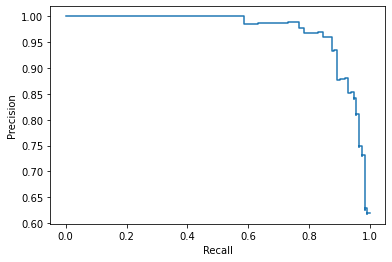

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_proba = modelo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
prec, recall, _ = precision_recall_curve(y_test, y_proba, pos_label=modelo.classes_[1])

roc_auc = auc(fpr, tpr)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
pr_display.plot()
plt.show()

___

## 4) **Exercícios** <a class="anchor" id="exercicios"></a>

Vamos treinar mais? Agora é com você!

_____________

### Exercício 1: Construa um classificador usando regressão logística

In [32]:
# APENAS DADOS NUMÉRICOS

# leia a base
df_titanic = pd.read_csv("data/titanic.csv")

# dropando as linhas com NaN
df_titanic = df_titanic.dropna(how="any", axis=0)

# separe as features e o target
# apenas features numéricas!!
X = df_titanic.select_dtypes(include=[np.number])
y = df_titanic["Survived"]

# importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# instancie a classe
estimador = LogisticRegression(max_iter=1000)

# faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    
# treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
print("\nClasses:", modelo.classes_)

# faça previsões
y_pred = modelo.predict(X_test)
print("\nPrevisões nos dados de teste:\n", y_pred)

# dê uma olhada nas probabilidades das previsões
probs = modelo.predict_proba(X_test)
print("\nProbabilidades dos dados teste:\n", probs)

# avalie o modelo
from sklearn.metrics import classification_report, confusion_matrix

print("\nMatriz de confusão do modelo nos dados de teste:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report do modelo nos dados de teste:")
print(classification_report(y_test, y_pred))

Coeficientes:
 [[ 0.001  4.621 -0.113 -0.024  0.316 -0.187  0.003]]

Intercept: [-1.529]

Classes: [0 1]

Previsões nos dados de teste:
 [0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0]

Probabilidades dos dados teste:
 [[0.821 0.179]
 [0.015 0.985]
 [0.668 0.332]
 [0.941 0.059]
 [0.034 0.966]
 [0.914 0.086]
 [0.067 0.933]
 [0.033 0.967]
 [0.052 0.948]
 [0.056 0.944]
 [0.094 0.906]
 [0.06  0.94 ]
 [0.06  0.94 ]
 [0.069 0.931]
 [0.839 0.161]
 [0.033 0.967]
 [0.055 0.945]
 [0.903 0.097]
 [0.02  0.98 ]
 [0.728 0.272]
 [0.046 0.954]
 [0.033 0.967]
 [0.059 0.941]
 [0.099 0.901]
 [0.08  0.92 ]
 [0.066 0.934]
 [0.785 0.215]
 [0.06  0.94 ]
 [0.064 0.936]
 [0.789 0.211]
 [0.92  0.08 ]
 [0.881 0.119]
 [0.063 0.937]
 [0.042 0.958]
 [0.036 0.964]
 [0.055 0.945]
 [0.059 0.941]
 [0.02  0.98 ]
 [0.152 0.848]
 [0.156 0.844]
 [0.091 0.909]
 [0.063 0.937]
 [0.04  0.96 ]
 [0.023 0.977]
 [0.058 0.942]
 [0.828 0.172]
 [0.081 0.919]


____________

### Exercício 2: leia o dataset iris e construa um classificador usando regressão logística

In [33]:
# leia a base
df_iris = pd.read_csv("data/iris.csv")

In [34]:
df_iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

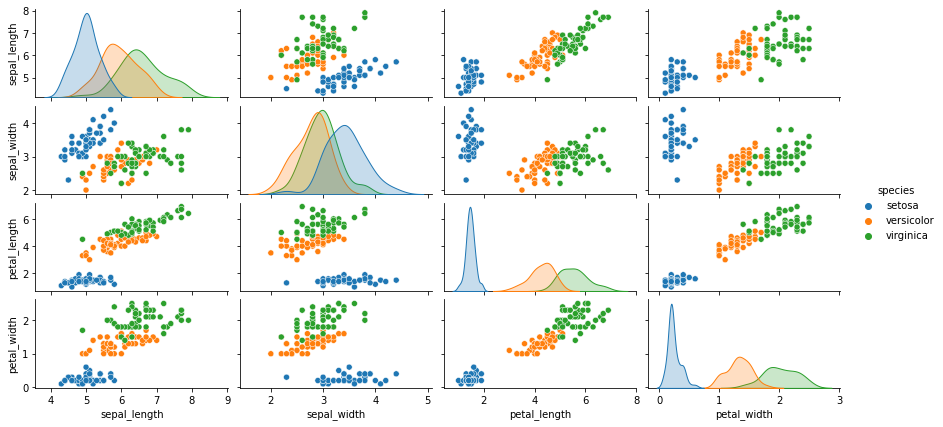

In [35]:
sns.pairplot(df_iris, hue="species", height=1.5, aspect=2)
plt.show()

In [36]:
# leia a base
df_iris = pd.read_csv("data/iris.csv")

# separe as features e o target
X = df_iris.drop(columns = "species")
y = df_iris["species"]

# importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# instancie a classe
estimador = LogisticRegression(max_iter=1000)

# faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
print("\nClasses:", modelo.classes_)

# faça previsões
y_pred = modelo.predict(X_test)
print("\nPrevisões nos dados de teste:\n", y_pred)

# dê uma olhada nas probabilidades das previsões
probs = modelo.predict_proba(X_test)
print("\nProbabilidades dos dados teste:\n", probs)

# avalie o modelo
from sklearn.metrics import classification_report, confusion_matrix

print("\nMatriz de confusão do modelo nos dados de teste:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report do modelo nos dados de teste:")
print(classification_report(y_test, y_pred))

Coeficientes:
 [[-0.397  0.961 -2.374 -1.003]
 [ 0.513 -0.253 -0.215 -0.769]
 [-0.116 -0.707  2.589  1.772]]

Intercept: [  9.032   1.841 -10.873]

Classes: ['setosa' 'versicolor' 'virginica']

Previsões nos dados de teste:
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']

Probabilidades dos dados teste:
 [[0.004 0.827 0.169]
 [0.947 0.053 0.   ]
 [0.    0.002 0.998]
 [0.006 0.792 0.201]
 [0.001 0.774 0.224]
 [0.956 0.044 0.   ]
 [0.078 0.908 0.014]
 [0.    0.156 0.844]
 [0.002 0.763 0.235]
 [0.028 0.946 0.026]
 [0.    0.243 0.756]
 [0.968 0.032 0.   ]
 [0.973 0.027 0.   ]
 [0.962 0.038 0.   ]
 [0.979 0.021 0.   ]
 [0.005 0.713 0.283]
 [0.    0.024 0.976]
 [0.027 0.948 0.025]
 [0.008 0.831 0.16

O problema do dataset iris é um problema de **classificação multiclasse**, pois há mais do que duas classes a serem preditas: no caso, 3.

<center><img src="https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png"></center>

Como vimos acima, o operacional de construção do modelo muda em absolutamente **nada**.

No entanto, conceitualmente, há algumas mudanças: a rigor, o modelo passa a se chamar **regresão logística MULTINOMIAL**, cujo processo de classificação é dado pela função **softmax**:

<center><img src="https://i.stack.imgur.com/YLeRi.png" width=600></center>

Para quem quiser saber mais sobre o "logit score", [clique aqui](https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun).
